In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

data = load_breast_cancer()
X = data.data
y = data.target 
print (data.feature_names)
# print(data)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Standardize features by removing the mean and scaling to unit variance.

In [26]:
from sklearn.preprocessing import StandardScaler
data =[[0,0],[0,0],[1,1],[1,1],[2,2],[2,2],[4,4],[4,4],[8,8],[8,8]]
scaler = StandardScaler() # z = (x - u) / s  --> sample x, u is the mean of the training samples, s is the standard deviation of the training samples
print (scaler.fit(data))
print(f"mean is {scaler.mean_}")
print(f"variance is {scaler.var_}")
print(f"Number of features seen during fit is: {scaler.n_features_in_}")
print(scaler.transform(data))

StandardScaler()
mean is [3. 3.]
variance is [8. 8.]
Number of features seen during fit is: 2
[[-1.06066017 -1.06066017]
 [-1.06066017 -1.06066017]
 [-0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.35355339 -0.35355339]
 [-0.35355339 -0.35355339]
 [ 0.35355339  0.35355339]
 [ 0.35355339  0.35355339]
 [ 1.76776695  1.76776695]
 [ 1.76776695  1.76776695]]


In [27]:
# we will only take two features for visualization purposes
X= data.data[:,[2,4]]# 'mean perimeter' & 'mean smoothness'

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# print(X.shape[0])#the number of sample
CFS=np.ones((X.shape[0],1))
# add bias (x_0 = 1) term to X
X_bias = np.hstack((X, np.ones((X.shape[0],1))))

X_train, X_val, y_train, y_val = train_test_split(X_bias, y, test_size=0.2,random_state=42, stratify=y)
# print(X_train[y_train == 0, 0])
plt.figure(figsize=[8,6])
plt.scatter(X_train[y_train == 0, 0], X_train[y_train==0, 1], color="r",label = "Malignant")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color = "b", label = "Benign")
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Smoothness")
plt.title("breast Cancer Dataset (Training Set)")
plt.legend()
plt.show()

AttributeError: 'list' object has no attribute 'data'

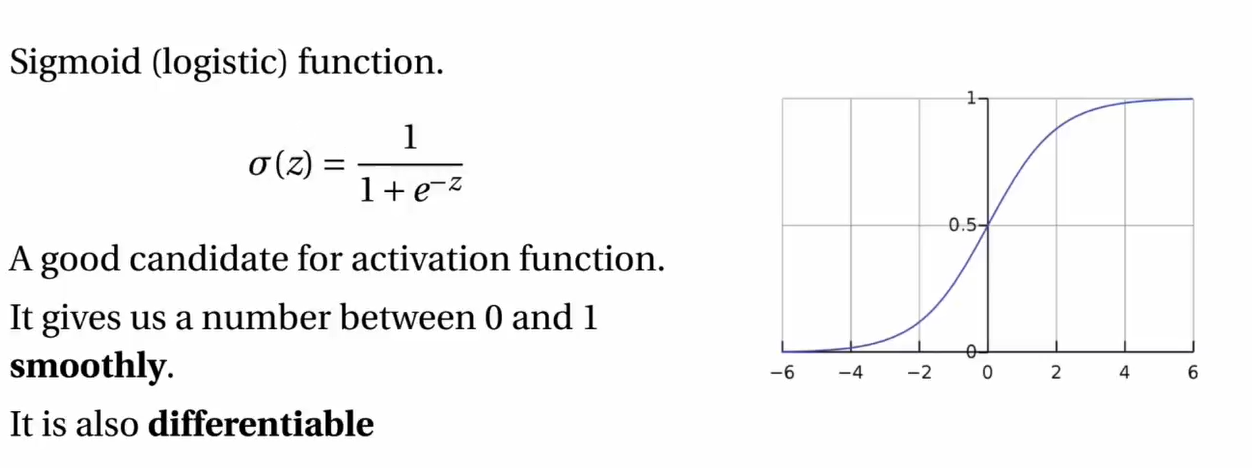

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(w,X,y):
    z = X @ w
    # applying the sigmoid function to get predicted porbobilities
    predictions = sigmoid(z)
    # binary cross-entropy loos
    loss = -np.mean(y *np.log(predictions)+(1 - y) * np.log(1-predictions))
    return loss

def compute_gradient(w, X, y):#for bach gradient descent
    z = X @ w
    predictions = sigmoid (z)
    # error = difference between predictied and ture labels
    errors = predictions - y
    # compute the gradient of the loss function
    gradient = X.T @ errors / len (y)
    return gradient

def validation_accuracy (w, X_val, y_val):
    probabilities = sigmoid(X_val @ w)
    predictions  = (probabilities > 0.5).astype(int) #decission rule for binary classification
    accuracy = np.mean(predictions == y_val)
    return accuracy

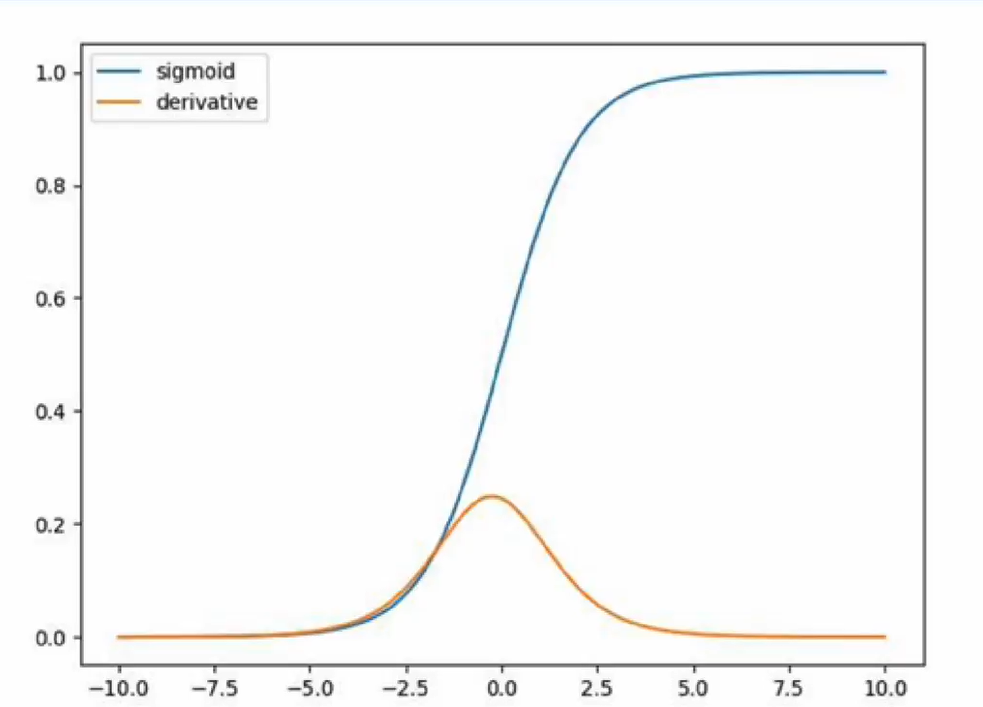

In [ ]:
def gradient_descent_logestic(x_train, y_train,
                               x_val, y_val, learning_rate= 0.1, 
                               n_steps = 1000, tolerance= 1e-6):
    w = np.zeros(X_train.shape[1]) #start with all weights equal to 0
    loss_history = [compute_loss(w, X_train, y_train)]
    validation_accuracy_history = [validation_accuracy(w, X_val, y_val)]
    weights_history = [w.copy()] #storing weights for decision boundary plotting

    for step in range(1, n_steps + 1):
        grad = compute_gradient(w, X_train, y_train)
        w -= learning_rate * grad #update rule
        loss = compute_loss(w, X_train, y_train)
        loss_history.append(loss)

        #compute validation accuracy 
        acc = validation_accuracy(w , X_val, y_val)
        validation_accuracy_history.append(acc)

        #storing weights every 10 steps for plotting
        if step % 10 == 0:
            weights_history.append(w.copy())

        # check convergence
        if np.abs(loss_history[-2]-loss_history[-1]) < tolerance:
            print (f"Converged at step {step}")
            break
        if step % 100 == 0:
            print(f"Step {step}: Loss = {loss :.4f}, Validation Accuracy = {acc:.4f}")
            
    return w, loss_history, validation_accuracy_history, weights_history

In [ ]:
learning_rate = 0.05
n_steps = 800

w_opt, loss_history, val_accuracy_history, weights_history = gradient_descent_logestic(
    X_train, y_train, X_val, y_val,
    learning_rate=learning_rate,
    n_steps= n_steps
)
print(f'Optimized weights: {w_opt}')
print(f"Decision rule:{w_opt[0]} * Mean Perimeter + {w_opt[1]} * Mean Smoothness + {w_opt[2]} > 0 : Benign")
print(f"Decision rule:{w_opt[0]} * Mean Perimeter + {w_opt[1]} * Mean Smoothness + {w_opt[2]} < 0 : Malignant")

Step 100: Loss = 0.3581, Validation Accuracy = 0.8860
Step 200: Loss = 0.2903, Validation Accuracy = 0.8860
Step 300: Loss = 0.2615, Validation Accuracy = 0.8860
Step 400: Loss = 0.2455, Validation Accuracy = 0.8860
Step 500: Loss = 0.2353, Validation Accuracy = 0.8860
Step 600: Loss = 0.2283, Validation Accuracy = 0.8860
Step 700: Loss = 0.2232, Validation Accuracy = 0.8860
Step 800: Loss = 0.2193, Validation Accuracy = 0.8860
Optimized weights: [-2.91812905 -1.07565575  0.59294996]
Decision rule:-2.918129049544554 * Mean Perimeter + -1.075655751703045 * Mean Smoothness + 0.5929499602501579 > 0 : Benign
Decision rule:-2.918129049544554 * Mean Perimeter + -1.075655751703045 * Mean Smoothness + 0.5929499602501579 < 0 : Malignant


C:\Users\ali_a\AppData\Local\Temp\ipykernel_124\1027843297.py:7: RuntimeWarning: invalid value encountered in scalar divide
  plt.axvline(x=-w[2] / w[0], color= "g")


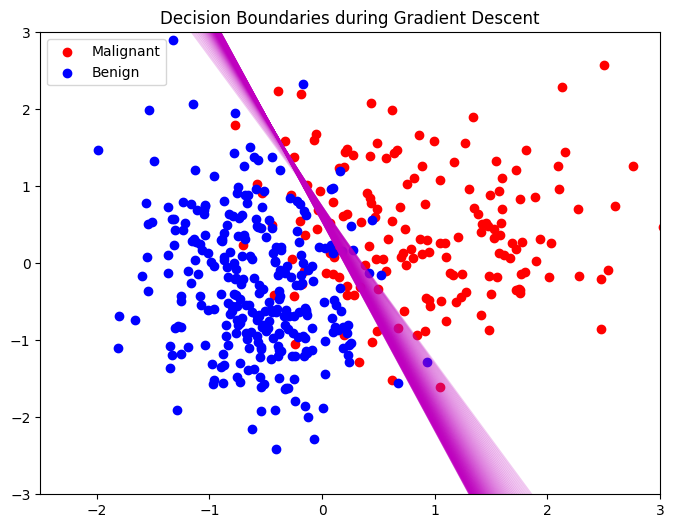

In [ ]:
def plot_decision_boundary(w, X, y, step, total_steps):
    x_values  = np.array ([X[:,0].min()-1, X[:,0].max()+1])
    if w[1] != 0:
        y_values = -(w[0] * x_values + w[2]) / w[1]
        plt.plot(x_values, y_values, color= "m", alpha = (0.20+(step / total_steps)*0.20))
    else:
        plt.axvline(x=-w[2] / w[0], color= "g")
    plt.legend()
    
def plot_decision_boundaries(weights_history, X, y, total_steps):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y == 0 , 0],X[y == 0 , 1], color = "r", label = "Malignant")
    plt.scatter(X[y == 1 , 0],X[y == 1 , 1], color = "b", label = "Benign")
    plt.xlim(-2.5,3)
    plt.ylim(-3,3)
    for i, w in enumerate(weights_history):
        step= i * 10
        plot_decision_boundary(w, X, y, step, total_steps)
    plt.title('Decision Boundaries during Gradient Descent')
    plt.show()

plot_decision_boundaries(weights_history, X_train[:, :2], y_train, n_steps)


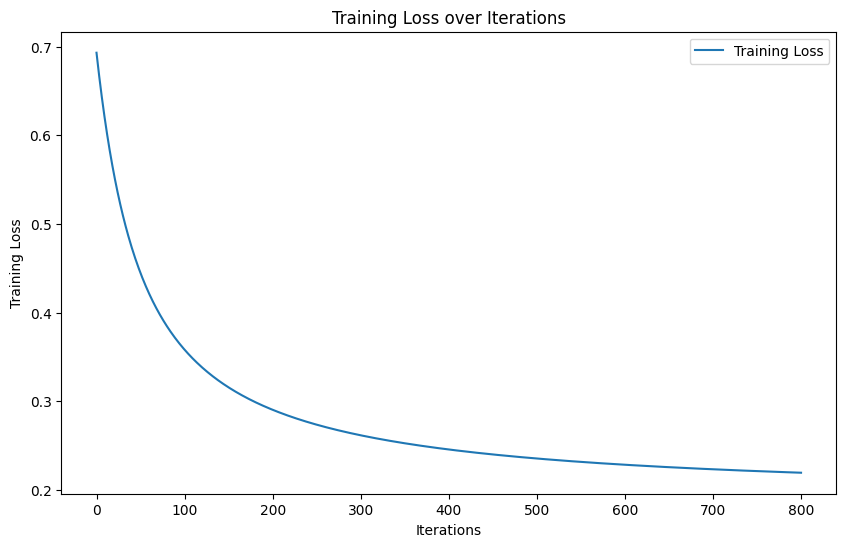

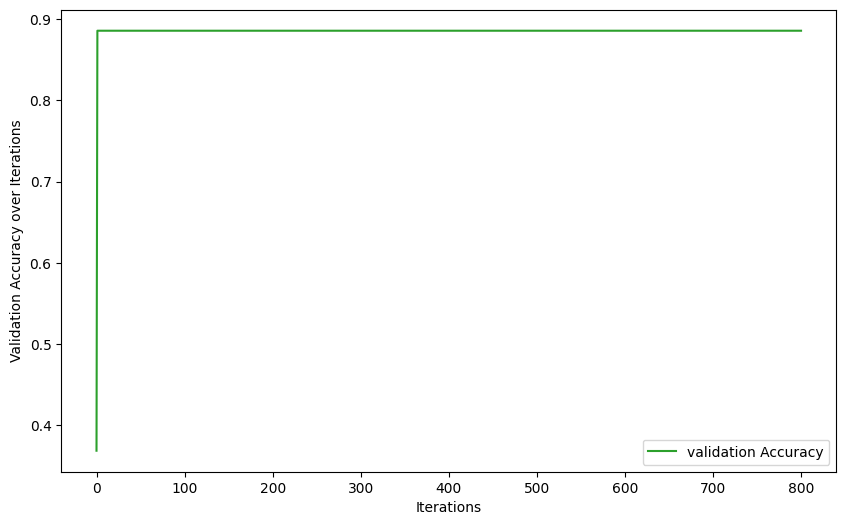

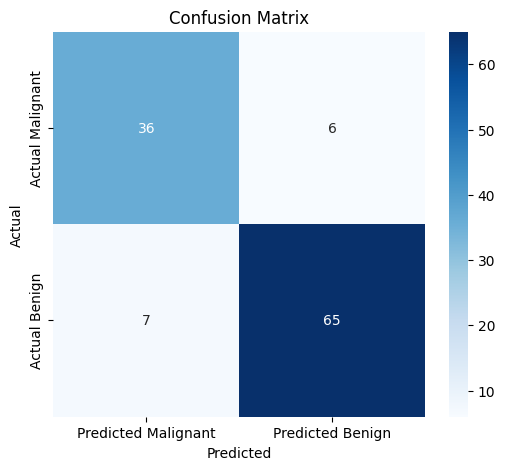

In [ ]:
def plot_training_loss(loss_history):
    epochs = range(len(loss_history))
    plt.figure(figsize=(10,6))
    plt.plot(epochs, loss_history, color='tab:blue', label = 'Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Training Loss')
    plt.title('Training Loss over Iterations')
    plt.legend()
    plt.show()

def plot_validation_accuacy(val_accuracy_history):
    epochs = range (len(val_accuracy_history))
    plt.figure(figsize=(10,6))
    plt.plot(epochs, val_accuracy_history, color= 'tab:green', label= "validation Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel('Validation Accuracy over Iterations')
    plt.legend()
    plt.show()

def plot_confusion_matrix_cm(w, X_val, y_val):
    probabilities = sigmoid(X_val @ w)
    predictions = (probabilities > 0.5).astype(int)

    cm = confusion_matrix(y_val, predictions)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",cmap = 'Blues',
                xticklabels= ['Predicted Malignant', 'Predicted Benign'],
                yticklabels= ['Actual Malignant', 'Actual Benign'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

plot_training_loss(loss_history)
plot_validation_accuacy(val_accuracy_history)
plot_confusion_matrix_cm(w_opt, X_val, y_val)



In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#Load the Iris dataset

data = load_iris()
X = data.data
y = data.target # labels (0,1,2 for the three classes)

print("Feature Names:", data.feature_names)
print("Target Names:", data.target_names)


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


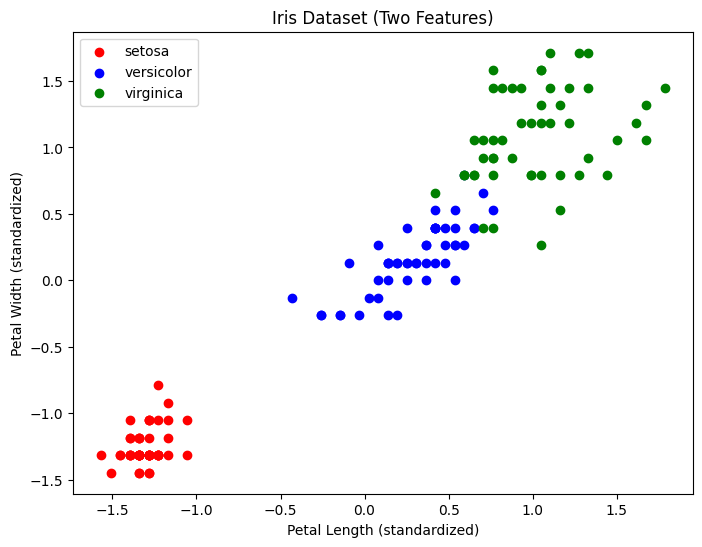

In [ ]:
feature_indices = [2,3] # 0-based indexing 
X = X[:,feature_indices]
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a bias term (colun of ones) to the feature matrix 
X_bias = np.hstack((X_scaled, np.ones ((X_scaled.shape[0],1))))
# Plot the standardized data
plt.figure(figsize=(8,6))
colors = ['red', 'blue' , 'green']
labels = data.target_names

for i in range(len(colors)):
    plt.scatter(X_scaled[y == i , 0], X_scaled[y == i, 1], color = colors[i], label = labels[i])

plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title("Iris Dataset (Two Features)")
plt.legend()
plt.show()


In [ ]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis= 1, keepdims=True)

def compute_loss(w, X, y):
    z = X @ w
    predictions = softmax(z)

    # converting labels to one-hot encoding 

    y_onehot = np.zeros_like(predictions)
    y_onehot[np.arage (len(y)), y ] = 1

    # cross-entropy loss
    epsilon = 1e-15 # to avoid log (0)
    loss = -np.mean(np.sum(y_onehot * np.log(predictions + epsilon), axis = 1))
    return loss



In [ ]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(w, X,y):
    z = X @ w
    predicrions = softmax(z)

    # converting labels to one-hot encoding

    y_onehot = np.zeros_like(predicrions)
    y_onehot[np.arange(len(y)), y] = 1

    # converting labels to one-hot encoding
    y_onehot = np.zeros_like(predicrions)
    y_onehot[np.arange(len(y)), y ] = 1

    #cross-entropy loss
    epsilon = 1e-15 # to avoid log (0)
    loss = -np.mean(np.sum(y_onehot * np.log(predicrions+epsilon),axis=1))
    return loss

def compute_gradient(w, X, y):
    z = X @ w
    predictions = softmax(z)

    # converting labels to one-hot encoding
    y_onehot = np.zeros_like(predictions)
    y_onehot[np.arange(len(y)),y]=1

    #gradient itself
    errors = predictions - y_onehot
    gradient = X.T @ errors / len(y)
    return gradient
def gradient_descent_multiclass(X, y ,learning_rate=0.1,n_steps = 10000, tolerance= 1e-6):
    n_features = X.shape[1]
    n_classes = np.max(y)+1 #labels are 0-indexed

    w = np.zeros((n_features, n_classes)) #start with all weights equal to zero
    loss_history = [compute_loss(w,X,y)]
    weights_history = [w.copy()] # For plotting decision boundaries

    for step in range(1, n_steps +1):
        grad  = compute_gradient(w,X,y)
        w -= learning_rate * grad
        loss = compute_loss(w,X,y)
        loss_history.append(loss)

        # storing weights every 10 steps for visualization
        if step % 10 == 0:
            weights_history.append(w.copy())

        #check for convergence
        if np.abs(loss_history[-2] - loss_history[-1])< tolerance:
            print(f'Converged at step {step}')
            break

    return w, loss_history, weights_history


Converged at step 9646


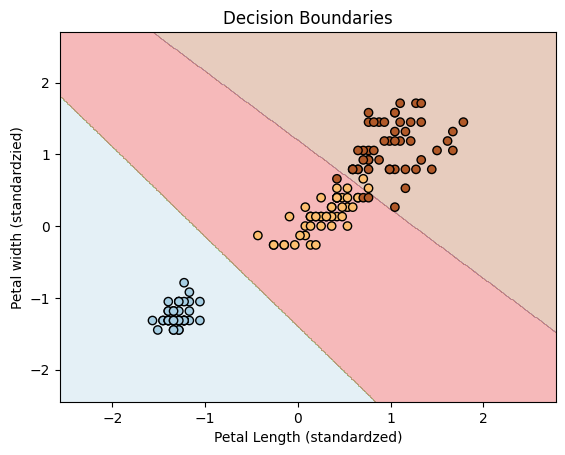

In [ ]:
w, loss_history, weights_history = gradient_descent_multiclass(X_bias, y)
# visualaze decision boundaries
def plot_decision_boundaries(X, y ,w):
    x_min, x_max = X[:,0].min()- 1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1,X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    x_grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]
    Z = np.argmax(softmax(x_grid @ w), axis=1)
    Z = Z.reshape (xx.shape)

    plt.contourf(xx, yy, Z, alpha = 0.3, cmap = plt.cm.Paired)
    plt.scatter(X[:,0],X[:,1],c=y, edgecolors='k',cmap = plt.cm.Paired)
    plt.xlabel('Petal Length (standardzed)')
    plt.ylabel('Petal width (standardzied)')
    plt.title("Decision Boundaries")
    plt.show()

plot_decision_boundaries(X_scaled, y, w)

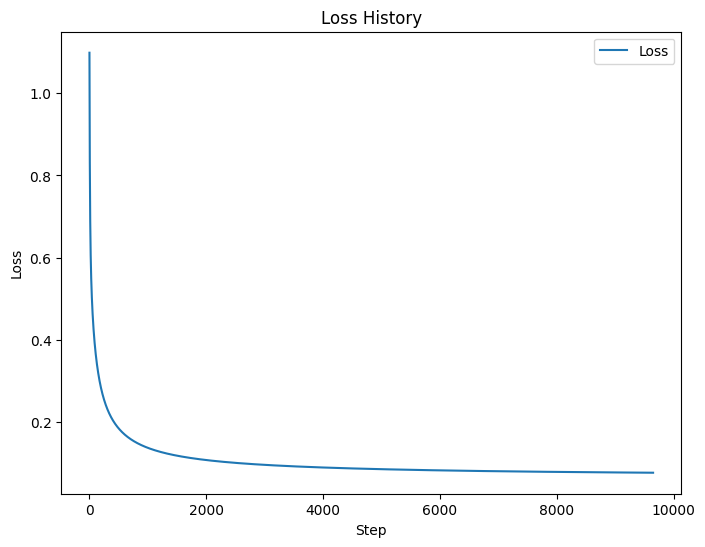

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(loss_history,label='Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title("Loss History")
plt.legend()
plt.show()
